In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\dme\Downloads\Order_Review_Analysis.csv', encoding='unicode_escape')

In [3]:
df.shape

(979, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Client Name          979 non-null    object 
 1   Order Date           979 non-null    object 
 2   Order No.            979 non-null    object 
 3   PRODUCT CODE         978 non-null    object 
 4   ITEM DESCRIPTION     978 non-null    object 
 5   BULB                 469 non-null    object 
 6   VOLT                 390 non-null    object 
 7   HSN CODE             950 non-null    object 
 8   IMAGE                0 non-null      float64
 9   TOTAL QTY.           978 non-null    float64
 10  UNIT                 978 non-null    object 
 11  RATE (Rs.) PER EACH  978 non-null    float64
 12  AMT. (Rs.)           979 non-null    float64
dtypes: float64(4), object(9)
memory usage: 99.6+ KB


In [5]:
df.drop(['BULB', 'VOLT', 'HSN CODE', 'IMAGE'], axis=1, inplace=True )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Client Name          979 non-null    object 
 1   Order Date           979 non-null    object 
 2   Order No.            979 non-null    object 
 3   PRODUCT CODE         978 non-null    object 
 4   ITEM DESCRIPTION     978 non-null    object 
 5   TOTAL QTY.           978 non-null    float64
 6   UNIT                 978 non-null    object 
 7   RATE (Rs.) PER EACH  978 non-null    float64
 8   AMT. (Rs.)           979 non-null    float64
dtypes: float64(3), object(6)
memory usage: 69.0+ KB


In [7]:
pd.isnull(df).sum()

Client Name            0
Order Date             0
Order No.              0
PRODUCT CODE           1
ITEM DESCRIPTION       1
TOTAL QTY.             1
UNIT                   1
RATE (Rs.) PER EACH    1
AMT. (Rs.)             0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 978
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Client Name          978 non-null    object 
 1   Order Date           978 non-null    object 
 2   Order No.            978 non-null    object 
 3   PRODUCT CODE         978 non-null    object 
 4   ITEM DESCRIPTION     978 non-null    object 
 5   TOTAL QTY.           978 non-null    float64
 6   UNIT                 978 non-null    object 
 7   RATE (Rs.) PER EACH  978 non-null    float64
 8   AMT. (Rs.)           978 non-null    float64
dtypes: float64(3), object(6)
memory usage: 76.4+ KB


In [11]:
df.columns

Index(['Client Name', 'Order Date', 'Order No.', 'PRODUCT CODE',
       'ITEM DESCRIPTION', 'TOTAL QTY.', 'UNIT', 'RATE (Rs.) PER EACH',
       'AMT. (Rs.)'],
      dtype='object')

In [12]:
df.describe()

,TOTAL QTY.,RATE (Rs.) PER EACH,AMT. (Rs.)
count,978.000000,978.000000,978.000000
mean,253.491820,172.643108,32557.004959
std,492.369346,173.774950,56838.707106
min,5.000000,0.000000,0.000000
25%,50.000000,62.000000,4800.000000
50%,100.000000,118.000000,12400.000000
75%,300.000000,244.250000,31894.100000
max,10000.000000,1740.000000,639702.000000


# Analysis on Product Code (Order Qty., Count, Amount)

In [14]:
##Product codes with order count in table form
df.groupby('PRODUCT CODE', as_index=False)['UNIT'].count().sort_values(by='UNIT', ascending=False)

,PRODUCT CODE,UNIT
118,LG-042,51
84,LG-002,31
258,TL-355,24
88,LG-005,19
93,LG-010,13
...,...,...
133,LG-079,1
136,LG-092,1
137,LG-098,1
138,LG-372,1


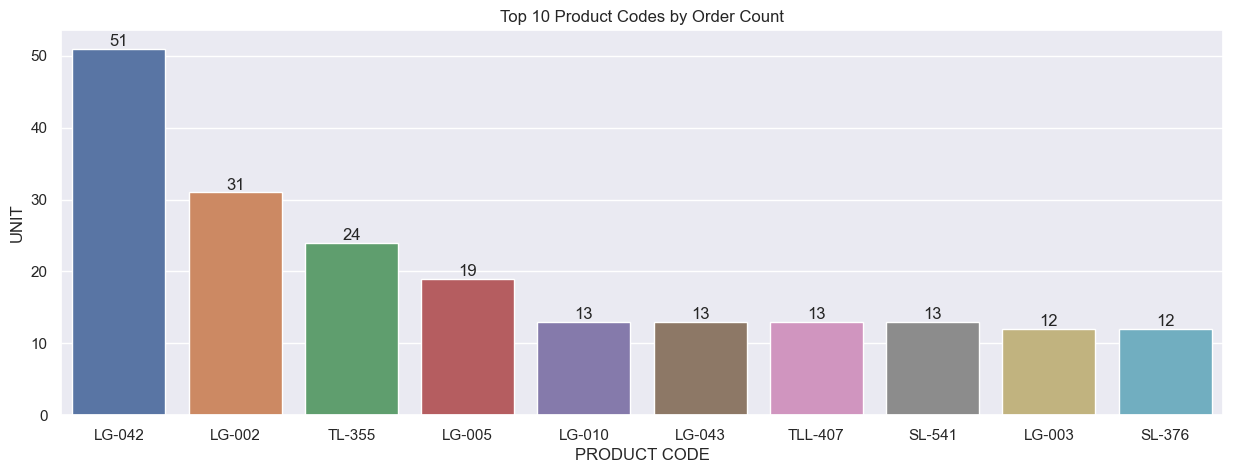

In [15]:
## Top 10 Product codes with maximum order count in barplot form
count = df.groupby('PRODUCT CODE', as_index=False)['UNIT'].count().sort_values(by='UNIT', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15, 5)})
ax = sns.barplot(x='PRODUCT CODE', y='UNIT', data= count)

# Annotate each bar with its count value
for index, value in enumerate(count['UNIT']):
    ax.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.title('Top 10 Product Codes by Order Count')
plt.show()

In [16]:
##Product codes with order qty in table form
df.groupby('PRODUCT CODE', as_index=False)['TOTAL QTY.'].sum().sort_values(by='TOTAL QTY.', ascending=False)

,PRODUCT CODE,TOTAL QTY.
118,LG-042,16670.0
144,MH-PLA-22,10000.0
84,LG-002,7736.0
258,TL-355,5400.0
298,TLL-355,4500.0
...,...,...
203,SL-597,10.0
283,TL-907,8.0
285,TLH-376,5.0
128,LG-064,5.0


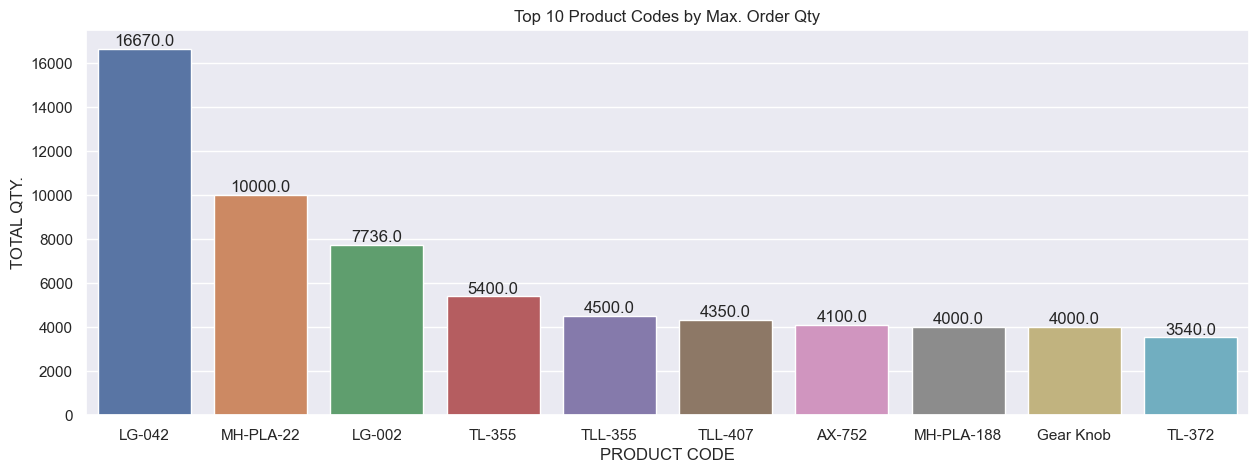

In [17]:
## Top 10 Product codes with maximum order qty in barplot form
qty = df.groupby('PRODUCT CODE', as_index=False)['TOTAL QTY.'].sum().sort_values(by='TOTAL QTY.', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15, 5)})
ax = sns.barplot(x='PRODUCT CODE', y='TOTAL QTY.', data= qty)

# Annotate each bar with its count value
for index, value in enumerate(qty['TOTAL QTY.']):
    ax.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.title('Top 10 Product Codes by Max. Order Qty')
plt.show()

In [18]:
##Product codes with order amount in table form
df.groupby('PRODUCT CODE', as_index=False)['AMT. (Rs.)'].sum().sort_values(by='AMT. (Rs.)', ascending=False)

,PRODUCT CODE,AMT. (Rs.)
258,TL-355,1299097.2
117,LG-040,1046350.0
118,LG-042,983579.0
84,LG-002,924736.0
91,LG-008,898620.0
...,...,...
56,BLPL-PL-134,258.0
57,BLPL-PL-135,228.0
287,TLL-303,123.0
184,SL-550,106.0


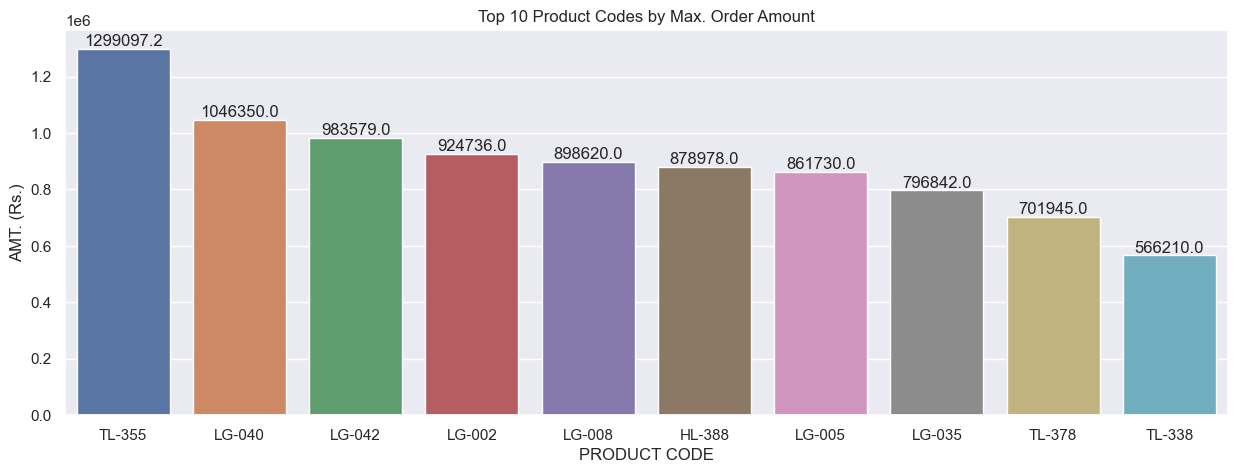

In [19]:
## Top 10 Product codes with maximum order qty in barplot form
amt = df.groupby('PRODUCT CODE', as_index=False)['AMT. (Rs.)'].sum().sort_values(by='AMT. (Rs.)', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15, 5)})
ax = sns.barplot(x='PRODUCT CODE', y='AMT. (Rs.)', data= amt)

# Annotate each bar with its count value
for index, value in enumerate(amt['AMT. (Rs.)']):
    ax.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.title('Top 10 Product Codes by Max. Order Amount')
plt.show()

#####Top 5 PRODUCT CODES with maximum no. of orders - 
1. LG-042 - 51
2. LG-002 - 31
3. TL-355 - 24
4. LG-005 - 19
5. LG-010 - 13

#####Top 5 PRODUCT CODES with maximum Qty. of orders- 
1. LG-042 - 16670.0
2. MH-PLA-22 - 10000.0
3. LG-002 - 7736.0
4. TL-355 - 5400.0
5. TLL-355 - 4500.0

#####Top 5 PRODUCT CODES(bulb and volt info included) with maximum Amt. of orders- 
1. TL-355 - Rs.12,99,097.2
2. LG-040 - Rs.10,46,350.0
3. LG-042 - Rs.9,83,579.0
4. LG-002 - Rs.9,24,736.0
5. LG-008 - Rs.8,98,620.0

### Conclusion-
1. TL-355, LG-042 and LG-042 these 3 product code are 

# Analysis on Client Name (Order Qty., Count, Amount)

In [20]:
##Client Name with order count in table form
df.groupby('Client Name', as_index=False)['UNIT'].count().sort_values(by='UNIT', ascending=False)

,Client Name,UNIT
6,All Parts Source International,143
51,Quality Tractor Parts LTD.,71
70,Surakhsha Transport System (india) (p) L,67
25,INTRACO IMPEX PVT. LTD.,64
59,SIMCO AUTO LIMITED,43
...,...,...
43,Macsons Export,1
46,NIYATI ENTERPRISES,1
49,Noble Electricals,1
53,S.S Clutch MFG. Co. Pvt. Ltd.,1


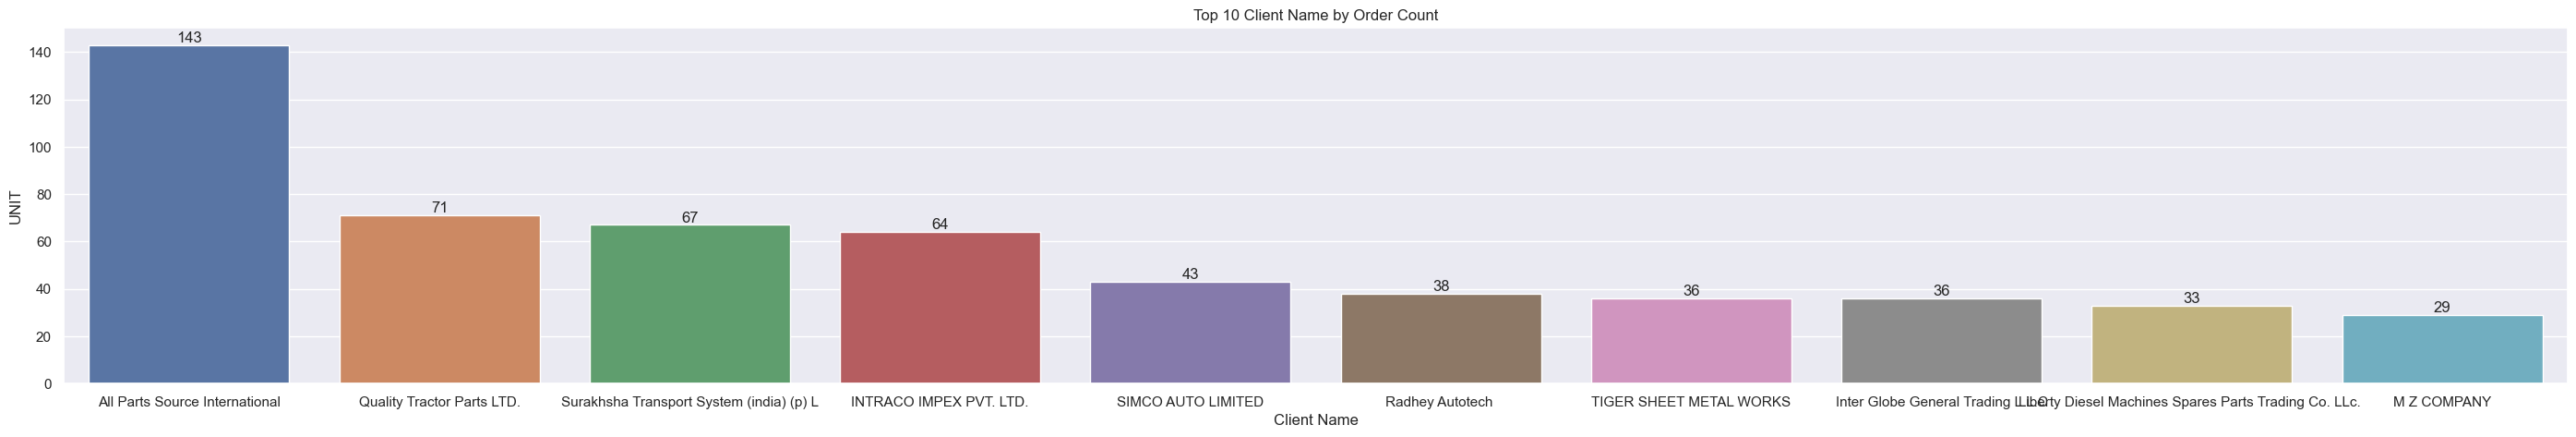

In [24]:
## Top 10 Client Name with maximum order count in barplot form
count = df.groupby('Client Name', as_index=False)['UNIT'].count().sort_values(by='UNIT', ascending=False).head(10)

sns.set(rc={'figure.figsize':(35, 5)})
ax = sns.barplot(x='Client Name', y='UNIT', data= count)

# Annotate each bar with its count value
for index, value in enumerate(count['UNIT']):
    ax.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.title('Top 10 Client Name by Order Count')
plt.show()

In [25]:
##Client Name with order qty in table form
df.groupby('Client Name', as_index=False)['TOTAL QTY.'].sum().sort_values(by='TOTAL QTY.', ascending=False)

,Client Name,TOTAL QTY.
13,BAJATO PARTS & SYSTEMS PRIVATE LIMITED,25592.0
70,Surakhsha Transport System (india) (p) L,23900.0
45,NEW GLOBAL IMPEX,12600.0
11,Autish Agro Exports,12550.0
51,Quality Tractor Parts LTD.,12275.0
...,...,...
40,M/s. Reliable Allies General Trading LLC,100.0
7,Amit Tractor,100.0
4,Adhunik Sales,100.0
0,A.R. AUTOMOTIVE SOLUTION,100.0


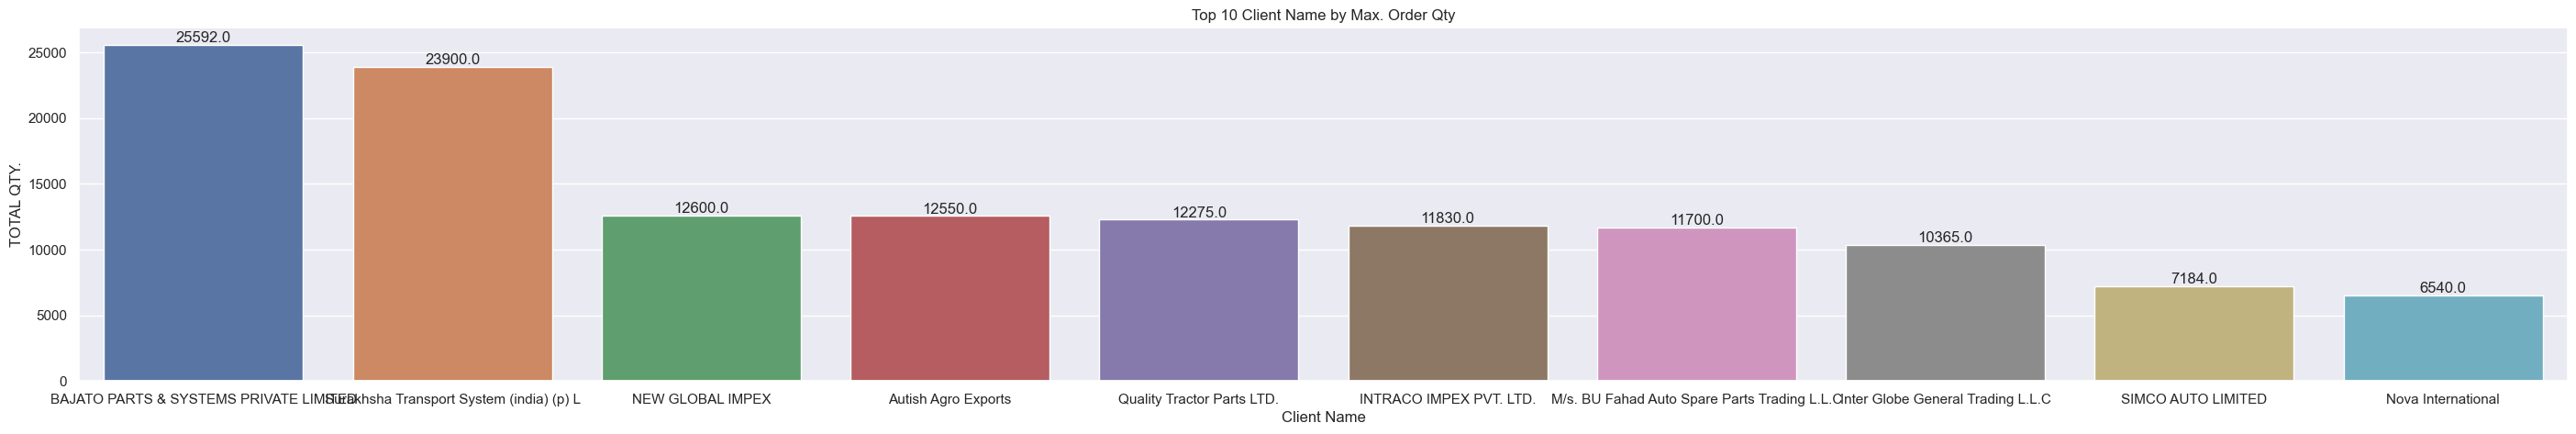

In [28]:
## Top 10 Client Name with maximum order qty in barplot form
qty = df.groupby('Client Name', as_index=False)['TOTAL QTY.'].sum().sort_values(by='TOTAL QTY.', ascending=False).head(10)

sns.set(rc={'figure.figsize':(35, 5)})
ax = sns.barplot(x='Client Name', y='TOTAL QTY.', data= qty)

# Annotate each bar with its count value
for index, value in enumerate(qty['TOTAL QTY.']):
    ax.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.title('Top 10 Client Name by Max. Order Qty')
plt.show()

In [29]:
##Client Name with order amount in table form
df.groupby('Client Name', as_index=False)['AMT. (Rs.)'].sum().sort_values(by='AMT. (Rs.)', ascending=False)

,Client Name,AMT. (Rs.)
51,Quality Tractor Parts LTD.,4454581.0
70,Surakhsha Transport System (india) (p) L,2904240.0
13,BAJATO PARTS & SYSTEMS PRIVATE LIMITED,2387472.0
45,NEW GLOBAL IMPEX,1263600.0
30,K J Auto Spare Parts Co. Ltd,1262494.8
...,...,...
74,U&T Tractor Spares Private Limited,16400.0
4,Adhunik Sales,15700.0
34,M.J.P. MOTORS,11200.0
7,Amit Tractor,10200.0


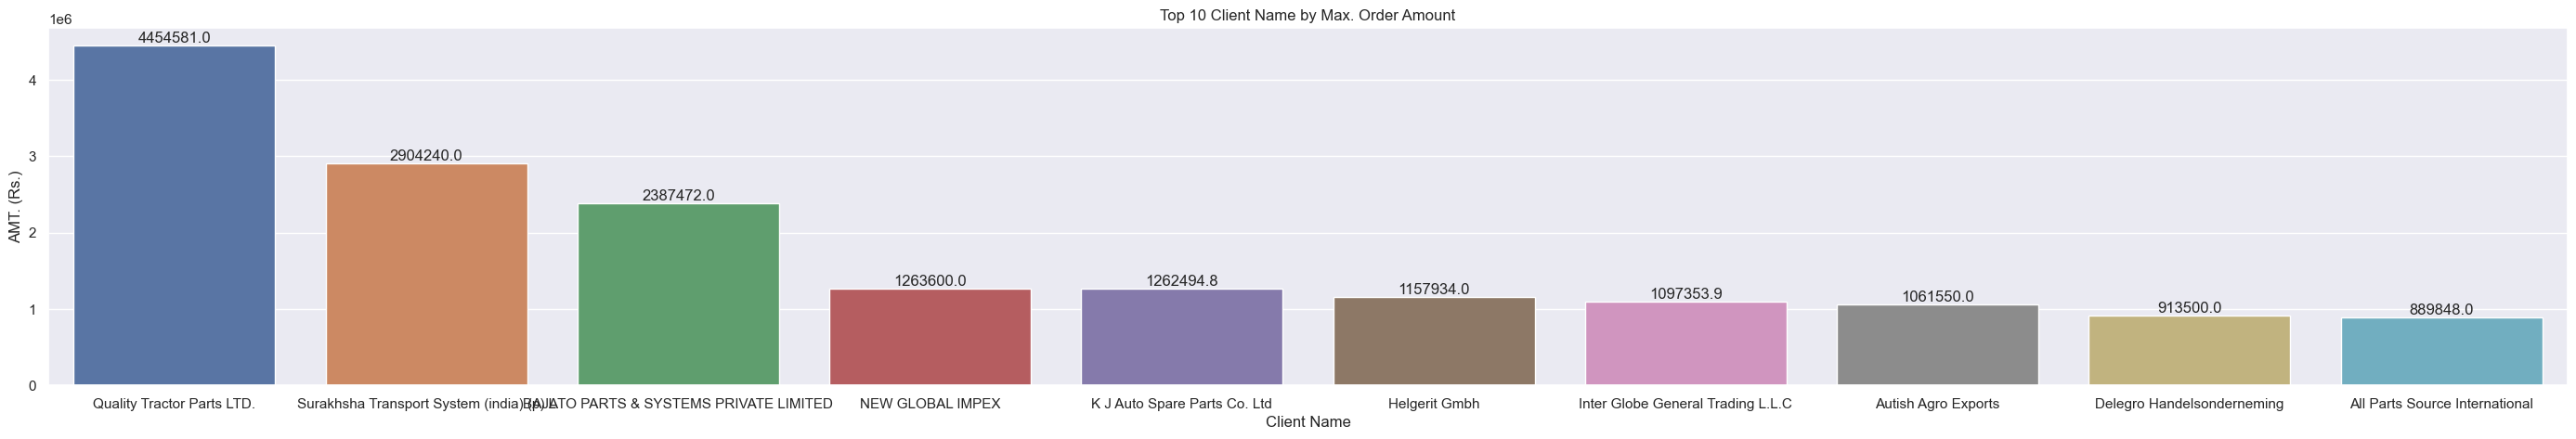

In [30]:
## Top 10 Client Name with maximum order qty in barplot form
amt = df.groupby('Client Name', as_index=False)['AMT. (Rs.)'].sum().sort_values(by='AMT. (Rs.)', ascending=False).head(10)

sns.set(rc={'figure.figsize':(35, 5)})
ax = sns.barplot(x='Client Name', y='AMT. (Rs.)', data= amt)

# Annotate each bar with its count value
for index, value in enumerate(amt['AMT. (Rs.)']):
    ax.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.title('Top 10 Client Name by Max. Order Amount')
plt.show()

#####Top 5 client names from whom we received maximum no. of orders - 
1. All Parts Source International- 143, 
2. Quality Tractor parts LTD.- 71, 
3. Surakhsha transport Syetem (india)(p) L- 67, 
4. INTRACO IMPEX PVT. LTD.- 64, 
5. SIMCO AUTO LIMITED- 43

#####Top 5 client names from whom we received maximum Qty. of orders- 
1. BAJATO PARTS & SYSTEMS PRIVATE LIMITED- 25,592
2. Surakhsha Transport System (india) (p) L- 23,900 
3. NEW GLOBAL IMPEX- 12,600 
4. Autish Agro Exports- 12,550 
5. Quality Tractor Parts LTD.- 12,275

#####Top 5 client names from whom we received maximum Amt. of orders- 
1. Quality Tractor Parts LTD.- Rs. 44,54,581.0 
2. Surakhsha Transport System (india) (p) L- Rs. 29,04,240.0 
3. BAJATO PARTS & SYSTEMS PRIVATE LIMITED- Rs. 23,87,472 
4. NEW GLOBAL IMPEX- Rs. 12,63,600.0 
5. K J Auto Spare Parts Co. Ltd- Rs. 12,62,494.8

### Conclusion-
1. From All Parts Source International and SIMCO AUTO LIMITED we are receiving maximum no. of orders but the qty. of products are less and they are not buying high price range product. 
2. BAJATO PARTS & SYSTEMS PRIVATE LIMITED, Quality Tractor parts LTD. and Surakhsha transport Syetem (india)(p) L are the main clients who are ordering maximum qty. and giving us main business.